This Notebook is for Extra tests on Agent Class

In [16]:
import GPy
import numpy as np
import matplotlib.pyplot as plt
import safeopt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sps

from agent_utilities import *


In [17]:
def global_reward(x1,x2,x3):
    "Each agent contributes to a different part of the global function"
    
    result =  np.sin(x1**3) + np.cos(x2**2) - np.sin(x3)
    
    return result



In [18]:
a1_bounds = (-1.5,1.5)
a2_bounds = (-1.5,1.5)
a3_bounds = (-1.5,1.5)

a_corr_bounds = (-1.5,1.5)

In [19]:

agent1 = Agent_gp(1,a1_bounds,0,a_corr_bounds)
agent2 = Agent_gp(2,a2_bounds,0.1,a_corr_bounds)
agent3 = Agent_gp(3,a3_bounds,-0.1,a_corr_bounds,False)

agents = [agent1,agent2,agent3]


Local Reward for agent 1 is [[0.]]
Agent 1 is using True as optimization criterion.
Local Reward for agent 2 is [[0.99995]]
Agent 2 is using True as optimization criterion.
Local Reward for agent 3 is [[-0.09983342]]
Agent 3 is using False as optimization criterion.


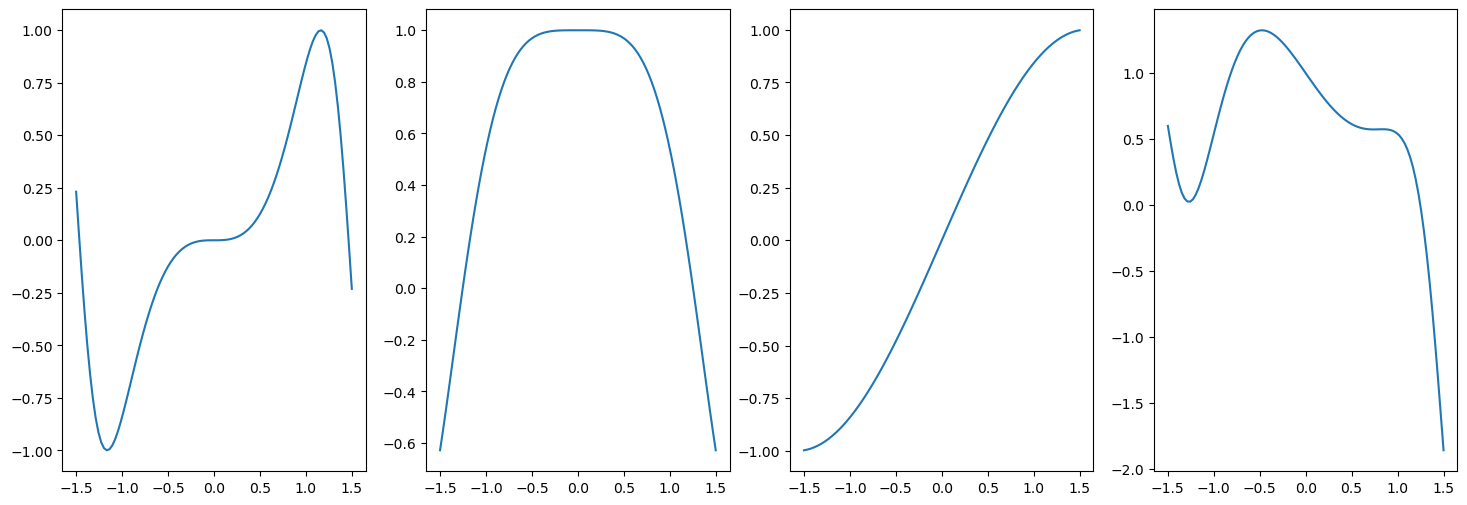

In [20]:
x_1 = np.linspace(a1_bounds[0],a1_bounds[1],100)
x_2 = np.linspace(a2_bounds[0],a2_bounds[1],100)
x_3 = np.linspace(a3_bounds[0],a3_bounds[1],100)

x_global = np.linspace(-1.5,1.5,100)

plt.figure(figsize=(18,6))
plt.subplot(1,4,1)
plt.plot(x_1,agent1.local_reward(x_1),label="Agent 1")
plt.subplot(1,4,2)
plt.plot(x_2,agent2.local_reward(x_2),label="Agent 2")
plt.subplot(1,4,3)
plt.plot(x_3,agent3.local_reward(x_3),label="Agent 3")
plt.subplot(1,4,4)
plt.plot(x_global,global_reward(x_global,x_global,x_global),label="Global Reward")

In [21]:
iterations = 100

In [22]:
# for _ in range(iterations):
#     x_next_1 = agent1.predict_local()
    
#     agent1_predictions = np.append(agent1_predictions,x_next_1)

#     y_meas_1 = agent1.local_reward(x_next_1)
#     agent1.update_local(x_next_1,y_meas_1)

#     x_next_2 = agent2.predict_local()
#     y_meas_2 = agent2.local_reward(x_next_2)
#     agent2.update_local(x_next_2,y_meas_2)

#     x_next_3 = agent3.predict_local()
#     y_meas_3 = agent3.local_reward(x_next_3)
#     agent3.update_local(x_next_3,y_meas_3)


In [23]:
# for _ in range(iterations):
#     x_pred_1 = agent1.predict_global()
#     x_pred_2 = agent2.predict_global()
#     x_pred_3 = agent3.predict_global()

#     y_meas = global_reward(x_pred_1,x_pred_2,x_pred_3)

#     #update global belief of all agents
#     agent1.update_global(x_pred_1,y_meas)
#     agent2.update_global(x_pred_2,y_meas)
#     agent3.update_global(x_pred_3,y_meas)


In [24]:
corr_arr_1 = []
corr_arr_2 = []
corr_arr_3 = []

Bayessian Optimization Loop


In [25]:
for _ in range(iterations):

    x_pred_local_1 = agent1.predict_local()
    x_pred_local_2 = agent2.predict_local()
    x_pred_local_3 = agent3.predict_local()

    y_meas_local_1 = agent1.local_reward(x_pred_local_1)
    agent1.update_local(x_pred_local_1,y_meas_local_1)

    y_meas_local_2 = agent2.local_reward(x_pred_local_2)
    agent2.update_local(x_pred_local_2,y_meas_local_2)
    
    y_meas_local_3 = agent3.local_reward(x_pred_local_3)
    agent3.update_local(x_pred_local_3,y_meas_local_3)


    x_pred_global_1 = agent1.predict_global()
    x_pred_global_2 = agent2.predict_global()
    x_pred_global_3 = agent3.predict_global()

    y_meas = global_reward(x_pred_global_1,x_pred_global_2,x_pred_global_3)

    agent1.update_global(x_pred_global_1,y_meas)
    agent2.update_global(x_pred_global_2,y_meas)
    agent3.update_global(x_pred_global_3,y_meas)

       
    # Ensure there are at least two data points before calculating correlation
    if len(agent1.local_rewards) >= 3 and len(agent1.global_rewards) >= 3:
        corr_1 = sps.stats.pearsonr(agent1.local_rewards, agent1.global_rewards)[0]
        corr_arr_1.append(corr_1)

        x_corr_1 = agent1.predict_corr()
        agent1.update_corr(x_corr_1,corr_1)

    if len(agent2.local_rewards) >= 3 and len(agent2.global_rewards) >= 3:
        corr_2 = sps.stats.pearsonr(agent2.local_rewards, agent2.global_rewards)[0]
        corr_arr_2.append(corr_2)

        x_corr_2 = agent2.predict_corr()
        agent2.update_corr(x_corr_2,corr_2)


    if len(agent3.local_rewards) >= 3 and len(agent3.global_rewards) >= 3:
        corr_3 = sps.stats.pearsonr(agent3.local_rewards, agent3.global_rewards)[0]
        corr_arr_3.append(corr_3)

        x_corr_3 = agent3.predict_corr()
        agent3.update_corr(x_corr_3,corr_3)







***PLOTING THE CORRELATION***

Text(0.5, 1.0, 'Agent 3 Correlation')

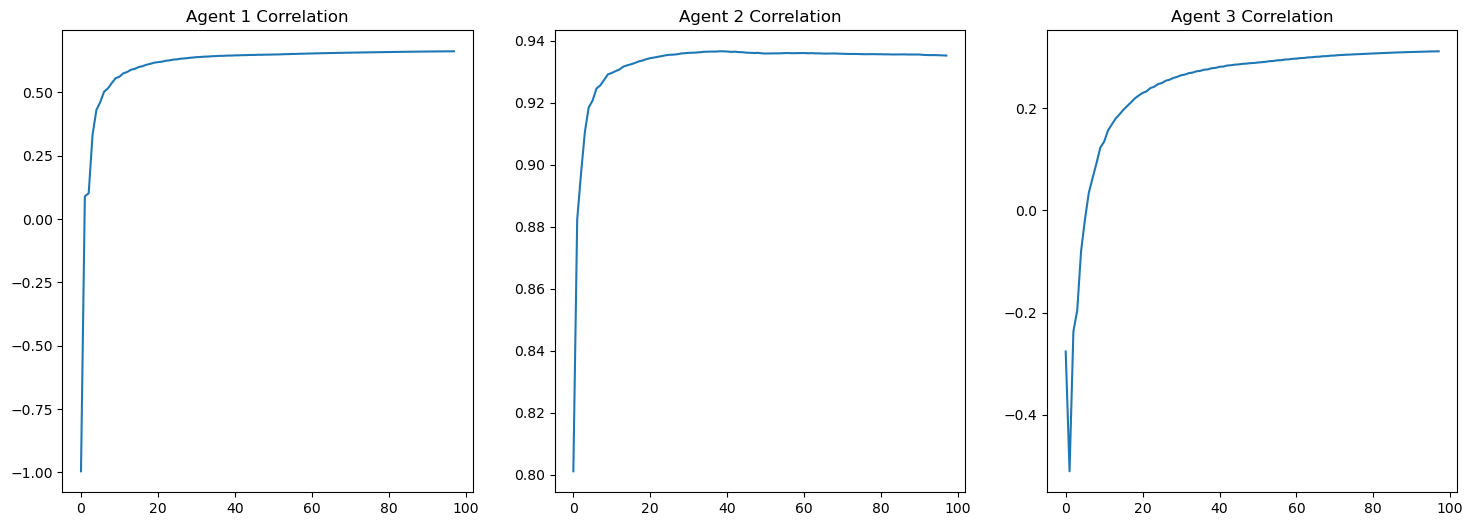

In [26]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.plot(corr_arr_1,label="Agent 1")
plt.title("Agent 1 Correlation")
plt.subplot(1,3,2)
plt.plot(corr_arr_2,label="Agent 2")
plt.title("Agent 2 Correlation")
plt.subplot(1,3,3)
plt.plot(corr_arr_3,label="Agent 3")
plt.title("Agent 3 Correlation")

In [27]:
print("reward is ",y_meas)

reward is  [1.8636214]


In [28]:
corr1 = sps.stats.pearsonr(agent1.local_rewards,agent1.global_rewards)[0]
corr2 = sps.stats.pearsonr(agent2.local_rewards,agent2.global_rewards)[0]
corr3 = sps.stats.pearsonr(agent3.local_rewards,agent3.global_rewards)[0]

print("Correlations : ",corr1,corr2,corr3)

Correlations :  0.6625942550112152 0.9352525714321289 0.3117808817179235


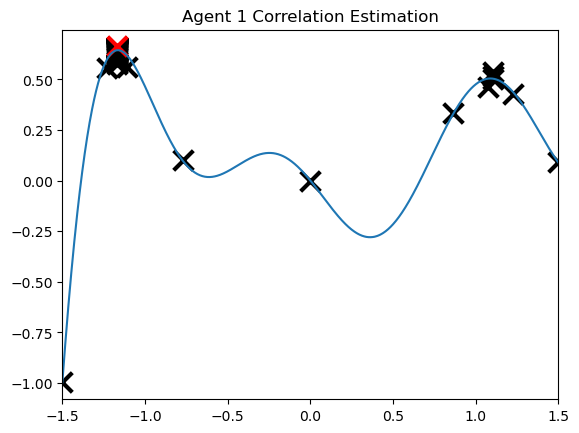

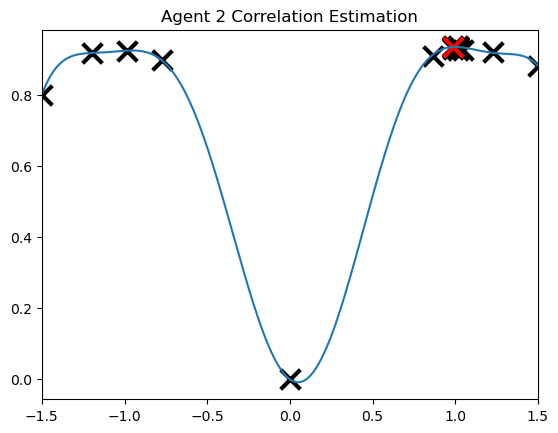

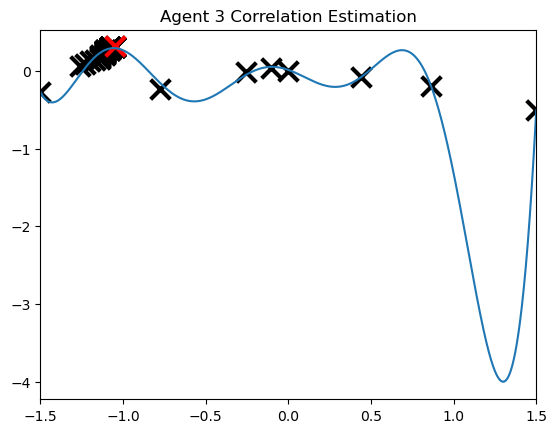

In [29]:
agent1.plot_corr_gp()
agent2.plot_corr_gp()
agent3.plot_corr_gp()

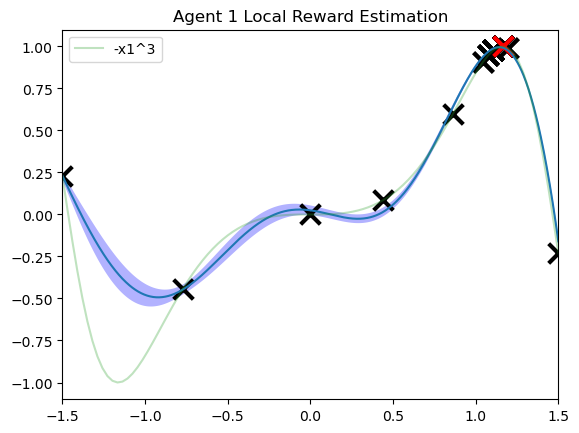

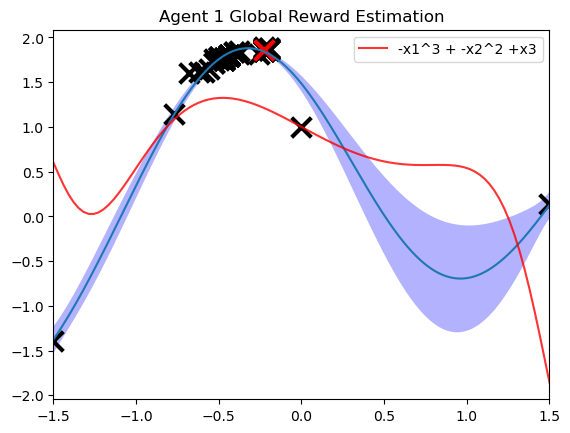

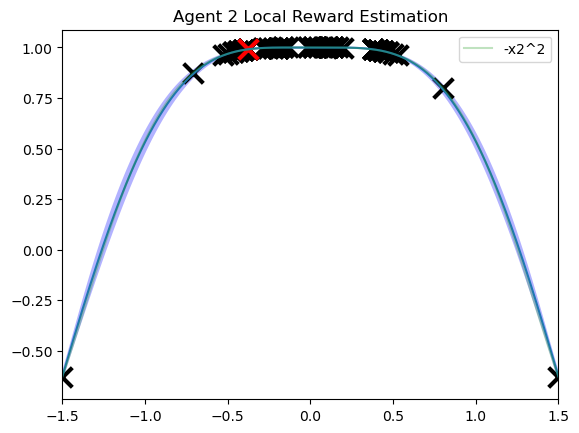

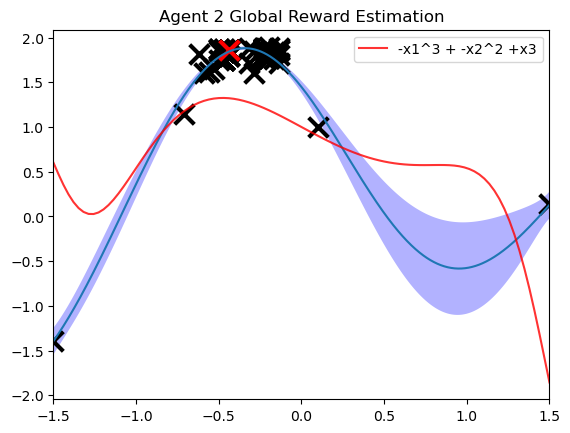

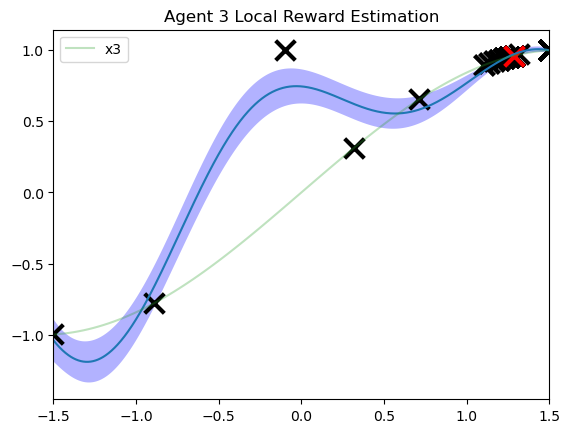

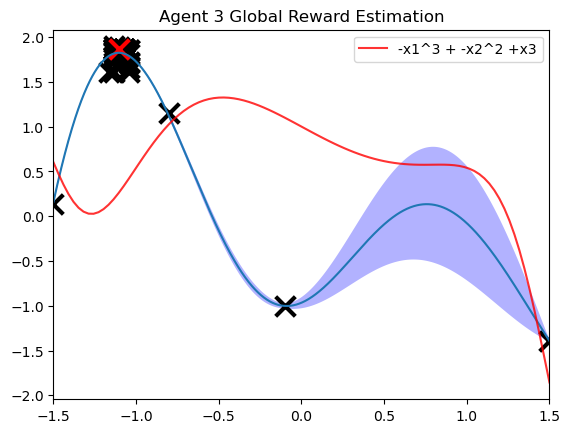

In [30]:
agent1.plot_gp_local()
agent1.plot_gp_global()

agent2.plot_gp_local()
agent2.plot_gp_global()

agent3.plot_gp_local()
agent3.plot_gp_global()